## Машины опорных векторов 

In [234]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
%matplotlib inline

## Загрузка базы данных "Ирисы Фишера" 


In [255]:
# загрузка базы
# data - словарь
iris = load_iris()

# Описание базы
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [256]:
# для того, чтобы загрузить X и y
X,y = iris.data, iris.target 
# или X,y =load_iris(return_X_y=True) 

### Разделим на тренировочную выборку и тест

В scikit-learn для этого есть функция train_test_split

In [257]:
(X_train, X_test, 
 y_train, y_test) = train_test_split(X,y, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


### Создадим и обучим классификатор

In [258]:
# создаем объект класса
# support vector classifier
# можно попробовать разные значения C
clf = SVC(C=10)

# обучаем
clf.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Проверим эффективность на тестовой выборке

In [259]:
# эффективность классификации
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Эффективность составила: {:.4}'.format(accuracy*100))

Эффективность составила: 95.56


### Визуализация decision boundary для классификаторов с разными ядрами

#### Вспомогательные функции для визуализации

In [260]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

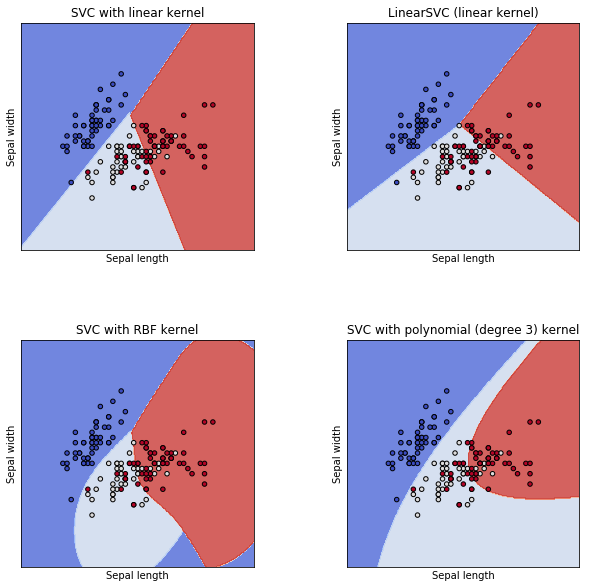

In [261]:
# Берем только первые два признака (это нужно для визуализации)
X_sub = iris.data[:, :2]

# Создаем несколько экземпляров SVM с разными ядрами
# линейное, радиално-базисное, полиномиальное
C = 10.0  # SVM параметр регуляризации
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))

# обучаем все четыре модели
models = (clf.fit(X_sub, y) for clf in models)

# названия для графиков
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# создаем 2x2 сетку для визуализации
fig, sub = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# создаем все возможные комбинации двух
# параметров
X0, X1 = X_sub[:, 0], X_sub[:, 1]
xx, yy = make_meshgrid(X0, X1)

# строим графики
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Кластеризация K-means

In [222]:
from sklearn.cluster import KMeans
from scipy import misc

## Откроем картинку как numpy массив

In [263]:
img = misc.imread('jackal.jpg')

# 3 - потому что картинка RGB
print(img.shape) 

(230, 210, 3)


выведем изображение на экран. Да, это шакал

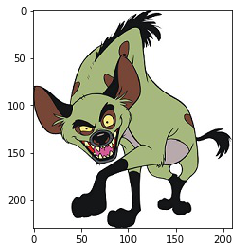

In [264]:
plt.imshow(img)
plt.show()

### Функция сжатия

In [265]:
def quantize(img, n_colors):
    # преобразуем изображение в 2D массив
    # это нужно для работы алгоритма
    width, height, depth = img.shape
    reshaped_img = np.reshape(img, (width * height, depth))

    # создаем экзмепляр класса KMeans
    # n_colors - это число кластеров
    model = KMeans(n_clusters=n_colors)
    # обучаем модель и получаем метку класса
    # для каждого пикселя
    labels = model.fit_predict(reshaped_img)
    # палитра - значение центров кластеров (цвет)
    palette = model.cluster_centers_
    
    # преобразовываем изображение
    # palette[labels] вернет цвета по индексам для каждого пикселя
    quantized_raster = np.reshape(
        palette[labels], (width, height, palette.shape[1]))

    return quantized_raster

### Создаем новое изображение и выводим его на экран

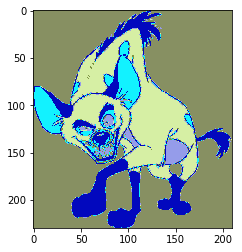

In [266]:
# в новом изображении всего 6 цветов
new_img = quantize(img, 6)
plt.imshow(new_img)